In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
from IPython.display import HTML
from IPython.display import display
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns

from scipy.optimize import curve_fit
os.chdir("..")
os.getcwd()

'/home/ubuntu/repos/training_dataset_size_per_class'

### Purpose of this notebook: 

### Visualize training dataset size data.

### Analyze full trainings:

In [3]:
#results = pd.read_csv("csv_files/Cifar10_acc_full_train_10_iterations_20230714.csv")
#results.head(2)
results = pd.read_csv("csv_files/emnistbalanced_full_dataset_trainings_mobilenet_20230921.csv")

results.head(2)

,itterations,accs,epoch,train_loss,val_loss
0,0,2.127660,0,986.975651,0.0
1,0,14.797872,2,825.119747,0.0


In [4]:
iterations = results.itterations.unique().tolist()
iterations

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

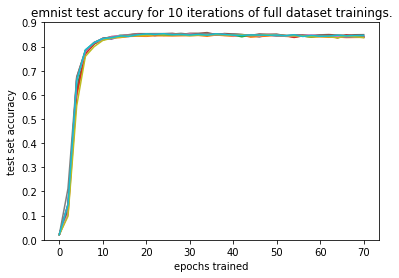

In [6]:
for it in iterations:
    mask = results.itterations == it
    plt.plot(results[mask].epoch, results[mask].accs / 100, label=it)
    plt.ylim((0, 0.9))

plt.xlabel("epochs trained")
plt.ylabel("test set accuracy")
plt.title("emnist test accury for 10 iterations of full dataset trainings.")
plt.savefig("paper/plots/emnist/full_dataset_acc_vs_epoch.jpg")
plt.show()


### Analyze different subset sizes:

In [8]:
#results = pd.read_csv("csv_files/Cifar10_acc_subsets_thomas_batch_size_512_mixture_design_maximin_subsetsize_45000_20230705.csv")
results = pd.read_csv("csv_files/emnist_train_acc_subsets_thomas_batch_size_512_mobilenet_mixture_design_maximin_subsetsize_20231103.csv")
print(results.shape)
results.head(2)

(64400, 50)


,accs,training_times,0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,d,e,f,g,h,n,q,r,t,epochs_trained
0,0.021277,4.356774,146.0,242.0,208.0,280.0,79.0,11.0,60.0,396.0,86.0,176.0,128.0,47.0,282.0,131.0,22.0,655.0,46.0,77.0,1935.0,157.0,118.0,1.0,182.0,33.0,27.0,213.0,15.0,122.0,76.0,45.0,178.0,217.0,179.0,34.0,73.0,1813.0,21.0,270.0,53.0,225.0,3.0,99.0,97.0,19.0,98.0,268.0,360.0,0
1,0.021277,5.514355,146.0,242.0,208.0,280.0,79.0,11.0,60.0,396.0,86.0,176.0,128.0,47.0,282.0,131.0,22.0,655.0,46.0,77.0,1935.0,157.0,118.0,1.0,182.0,33.0,27.0,213.0,15.0,122.0,76.0,45.0,178.0,217.0,179.0,34.0,73.0,1813.0,21.0,270.0,53.0,225.0,3.0,99.0,97.0,19.0,98.0,268.0,360.0,2


In [9]:
classes = results.columns.tolist()[2:-1]

In [16]:
results.head(2)

,accs,training_times,0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,d,e,f,g,h,n,q,r,t,epochs_trained,row_no,n_train
0,0.021277,4.356774,146.0,242.0,208.0,280.0,79.0,11.0,60.0,396.0,86.0,176.0,128.0,47.0,282.0,131.0,22.0,655.0,46.0,77.0,1935.0,157.0,118.0,1.0,182.0,33.0,27.0,213.0,15.0,122.0,76.0,45.0,178.0,217.0,179.0,34.0,73.0,1813.0,21.0,270.0,53.0,225.0,3.0,99.0,97.0,19.0,98.0,268.0,360.0,0,0,10000.0
1,0.021277,5.514355,146.0,242.0,208.0,280.0,79.0,11.0,60.0,396.0,86.0,176.0,128.0,47.0,282.0,131.0,22.0,655.0,46.0,77.0,1935.0,157.0,118.0,1.0,182.0,33.0,27.0,213.0,15.0,122.0,76.0,45.0,178.0,217.0,179.0,34.0,73.0,1813.0,21.0,270.0,53.0,225.0,3.0,99.0,97.0,19.0,98.0,268.0,360.0,2,1,10000.0


In [19]:
results["row_no"] = results.reset_index().index
#results["exp_no"] = np.floor(results.row_no % 40)
results["exp_no"] = np.floor(results.row_no / 46)
results["n_train"] = np.round(results[classes].sum(axis=1), -2)
results.head(2)


,accs,training_times,0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,d,e,f,g,h,n,q,r,t,epochs_trained,row_no,n_train,exp_no
0,0.021277,4.356774,146.0,242.0,208.0,280.0,79.0,11.0,60.0,396.0,86.0,176.0,128.0,47.0,282.0,131.0,22.0,655.0,46.0,77.0,1935.0,157.0,118.0,1.0,182.0,33.0,27.0,213.0,15.0,122.0,76.0,45.0,178.0,217.0,179.0,34.0,73.0,1813.0,21.0,270.0,53.0,225.0,3.0,99.0,97.0,19.0,98.0,268.0,360.0,0,0,10000.0,0.0
1,0.021277,5.514355,146.0,242.0,208.0,280.0,79.0,11.0,60.0,396.0,86.0,176.0,128.0,47.0,282.0,131.0,22.0,655.0,46.0,77.0,1935.0,157.0,118.0,1.0,182.0,33.0,27.0,213.0,15.0,122.0,76.0,45.0,178.0,217.0,179.0,34.0,73.0,1813.0,21.0,270.0,53.0,225.0,3.0,99.0,97.0,19.0,98.0,268.0,360.0,2,1,10000.0,0.0


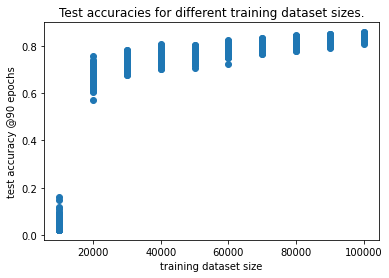

In [11]:
# visualize the test accs for the latest epoch:
mask = results.epochs_trained == 90
plt.scatter(results[mask].n_train, results[mask].accs)
plt.xlabel("training dataset size")
plt.ylabel("test accuracy @90 epochs")
plt.title("Test accuracies for different training dataset sizes.")
plt.savefig("paper/plots/emnist/training_datasetsize_vs_test_acc.jpg")
plt.show()


In [14]:
n_trains = results.n_train.unique().tolist()
n_trains

[10000.0,
 20000.0,
 30000.0,
 40000.0,
 50000.0,
 60000.0,
 70000.0,
 80000.0,
 90000.0,
 100000.0]

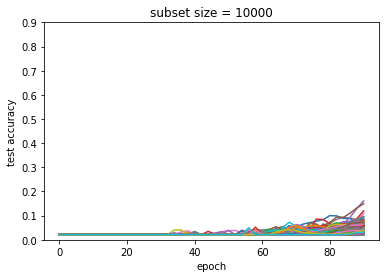

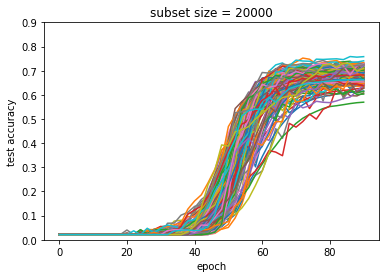

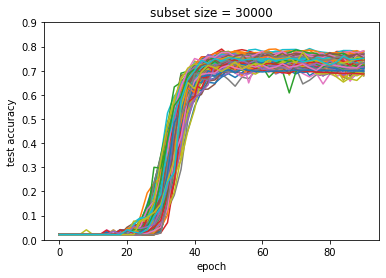

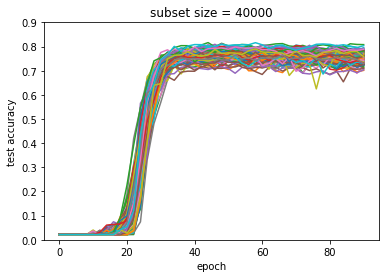

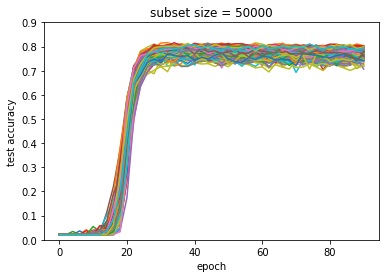

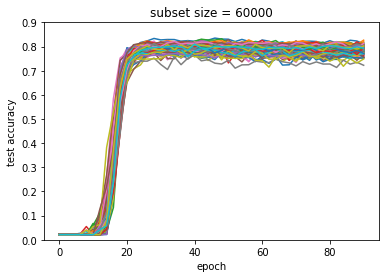

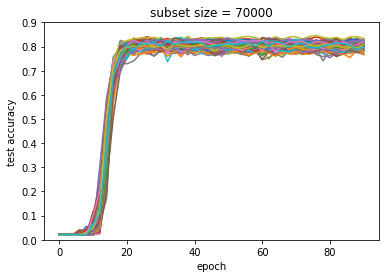

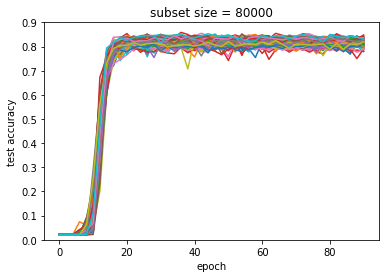

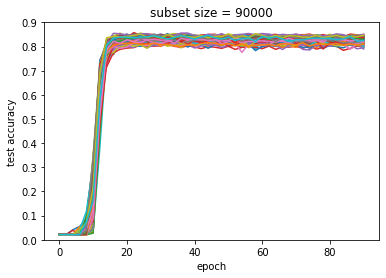

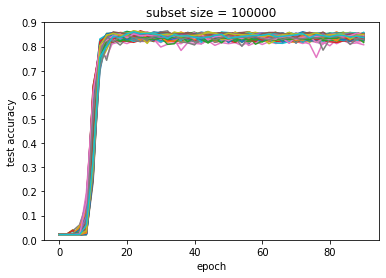

In [20]:

exp_nos = results.exp_no.unique().tolist()
n_train = n_trains[0]
#exp_no = exp_nos[0]
#results[mask]

for n_train in n_trains:
    for exp_no in exp_nos: 
        mask = (results.n_train == n_train) & (results.exp_no == exp_no)
        plt.plot(results[mask].epochs_trained, results[mask].accs, label=exp_no)
    plt.title(f"subset size = {int(n_train)}")
    plt.ylim((0, 0.9))
    plt.xlabel("epoch")
    plt.ylabel("test accuracy")
    plt.savefig(f"paper/plots/emnist/test_acc_vs_epoch_subset_size_{int(n_train)}.jpg")
    plt.show()


In [ ]:
# Visualize all data in one plot:
#results.head(2)
#plt.figure(figsize=(15,10))
#sns.scatterplot(data=results, x="epochs_trained", y="accs", hue="n_train")
#plt.show()


In [1]:
#mask = results.n_train == 20000
#doe = results[mask][classes].drop_duplicates().reset_index(drop=True)
#sns.pairplot(doe)
#plt.show()

In [ ]:
#mask = results.n_train == 100000
#doe = results[mask][classes].drop_duplicates().reset_index(drop=True)
#sns.pairplot(doe)
#plt.show()